#Comparative Analysis of Machine Learning and Deep Learning Algorithms for Credit Card Fraud Detection: A Multi-Dataset Approach
The prevalence of credit card fraud continues to pose significant financial and security risks for individuals, businesses, and financial institutions. Traditional rule-based systems are often insufficient in detecting increasingly sophisticated fraudulent activities. To address this challenge, the aim of this study is to develop and evaluate machine learning and deep learning models for accurate and efficient credit card fraud detection.
#Background:
The dataset used in this study contains credit card transactions made by European cardholders in September 2013. It includes features resulting from Principal Component Analysis (PCA) transformation, which ensures the confidentiality of the original data. The dataset is highly imbalanced, with a very small proportion of fraudulent transactions compared to legitimate ones.
1.	Data Source and Timeframe: The dataset consists of credit card transactions that occurred in September 2013. The transactions were made by European cardholders.
2.	Transaction Details: The dataset covers transactions over a span of two days. Out of the 284,807 transactions in the dataset, 492 of them are labelled as fraudulent (positive class). This means that the vast majority (99.828%) of the transactions are legitimate (negative class).
3.	Data Imbalance: The dataset is highly imbalanced due to the small number of fraudulent transactions compared to legitimate ones. This imbalance is common in real-world fraud detection scenarios, as fraudulent transactions are typically a rare occurrence.
4.	Features: The dataset contains only numerical input features. Most of these features (V1 to V28) are the result of applying Principal Component Analysis (PCA) transformation to the original features. Unfortunately, the original features and additional background information are not provided due to confidentiality issues. The 'Time' feature represents the time elapsed between a transaction and the first transaction in the dataset. The 'Amount' feature represents the transaction amount.
5.	Response Variable: The 'Class' feature is the response variable that indicates whether a transaction is fraudulent (1) or legitimate (0).

#Objective:
 The primary objective of this study is to build and evaluate predictive models capable of identifying fraudulent credit card transactions with high accuracy, while minimizing false positives and false negatives. This involves the application of various machine learning and deep learning techniques to effectively handle the imbalanced nature of the dataset and capture intricate patterns associated with fraudulent activities.
#Approach:

1.	Data Exploration, Comprehension, and Visualization
2.	Data Preprocessing for Model Development
3.	Constructing the Model
4.	Assessing Model Performance


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from sklearn.model_selection import learning_curve


#Data collection

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.isnull().sum().max())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     

In [ ]:
#let us look at the number of unique values in the dataset
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [ ]:
# Summary statistics of numerical features
numerical_summary = df.describe()
print(numerical_summary)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

#Data exploration

In [ ]:
#determing the shape of the dataset
df.shape

(284807, 31)

In [ ]:
amount_mean = df['Amount'].mean().round(2)
print("Amount of money on average per transactions:" , amount_mean, )

Amount of money on average per transactions: 88.35


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Ratio of Frauds and Non- Frauds data
print('Non-Frauds', round(df['Class'].value_counts()[0]/len(df)* 100,2),"% of the dataset")
print('Frauds', round(df['Class'].value_counts()[1]/len(df)* 100,2),"% of the dataset")

Non-Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


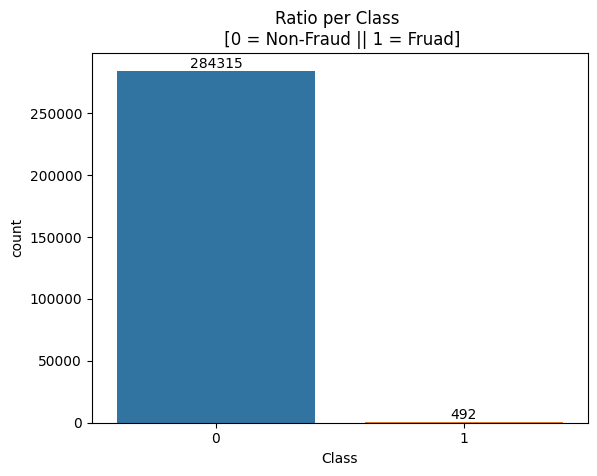

In [ ]:
ax = sns.countplot(x=df['Class'])
plt.title("Ratio per Class \n [0 = Non-Fraud || 1 = Fruad]")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<ipython-input-12-14412076448d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0],kde=True)
<ipython-input-12-14412076448d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1],kde=True)


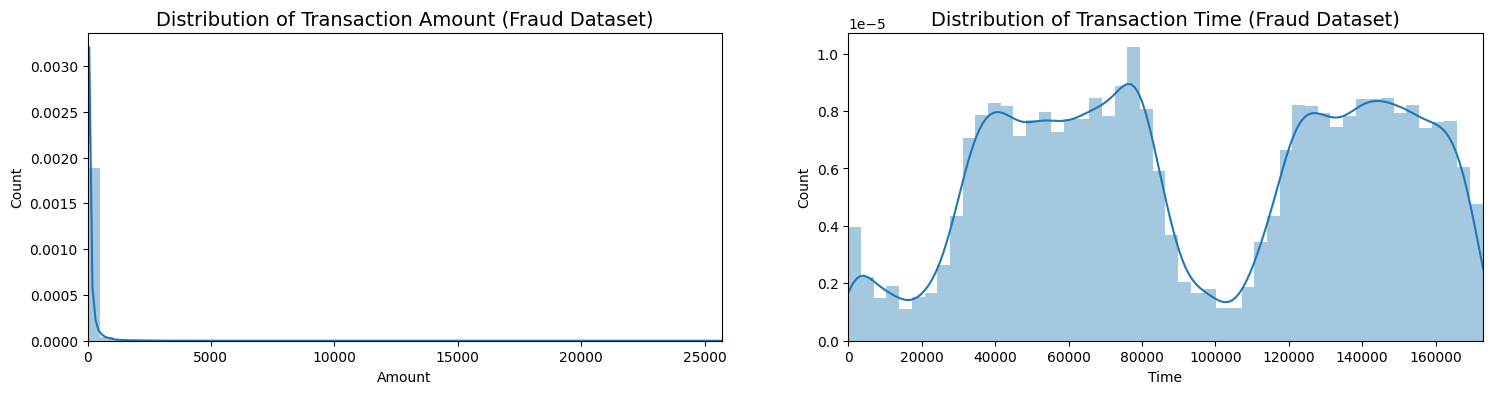

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0],kde=True)
ax[0].set_title('Distribution of Transaction Amount (Fraud Dataset)', fontsize=14)
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Count')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1],kde=True)
ax[1].set_title('Distribution of Transaction Time (Fraud Dataset)', fontsize=14)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Count')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

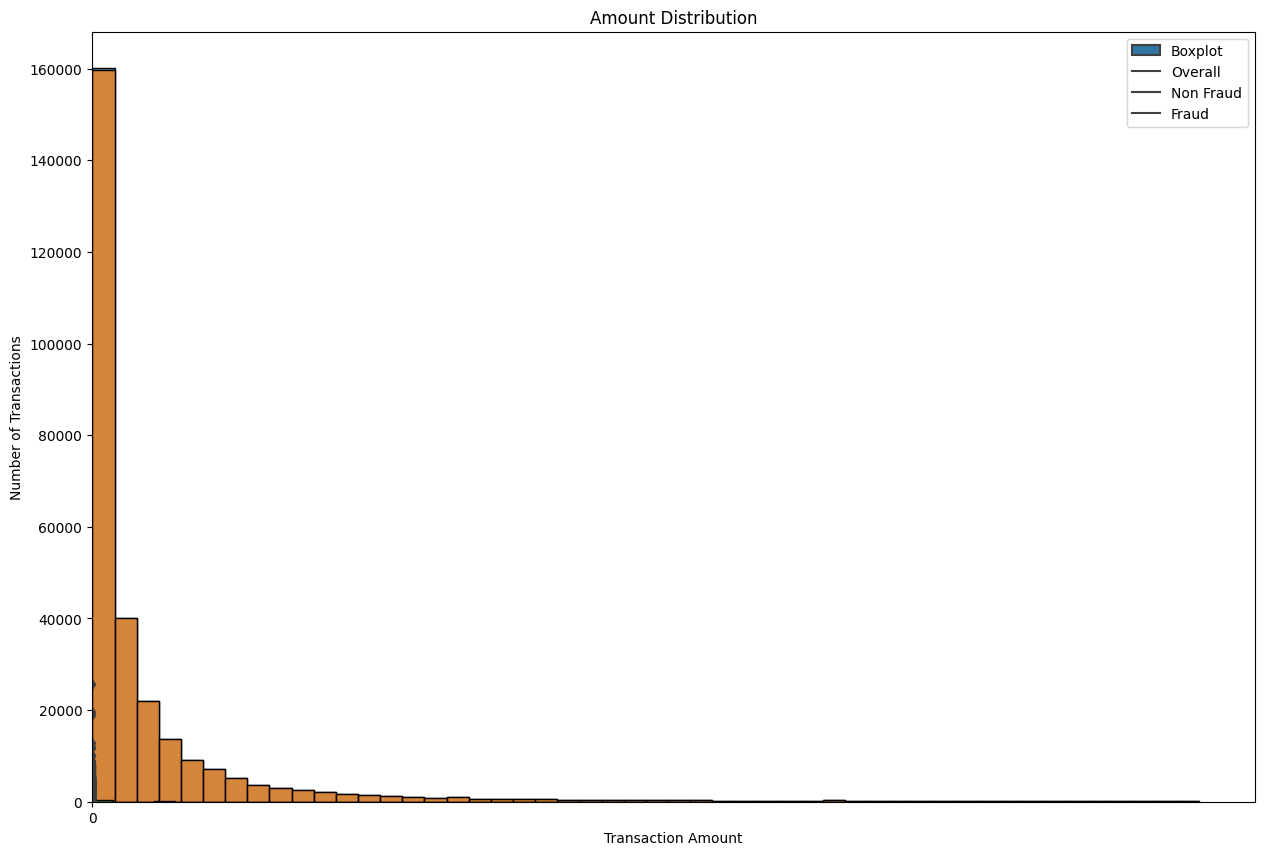

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with specified size
fig, plots = plt.subplots(figsize=(15, 10))

# Plotting the 'Amount' feature
# Box plot
plots = sns.boxplot(df['Amount'], ax=plots)

# Distribution plots
sns.histplot(data=df[df['Amount'] <= 1500], x='Amount', bins=50, ax=plots)
sns.histplot(data=df[(df['Class'] == 0) & (df['Amount'] <= 1500)], x='Amount', bins=50, ax=plots)
sns.histplot(data=df[(df['Class'] == 1) & (df['Amount'] <= 1500)], x='Amount', bins=50, ax=plots)

# Setting titles
plots.set_title('Amount Distribution')

# Setting x and y labels
plots.set_xlabel('Transaction Amount')
plots.set_ylabel('Number of Transactions')

# Adding legends for distribution types
plots.legend(labels=['Boxplot', 'Overall', 'Non Fraud', 'Fraud'])

plt.show()


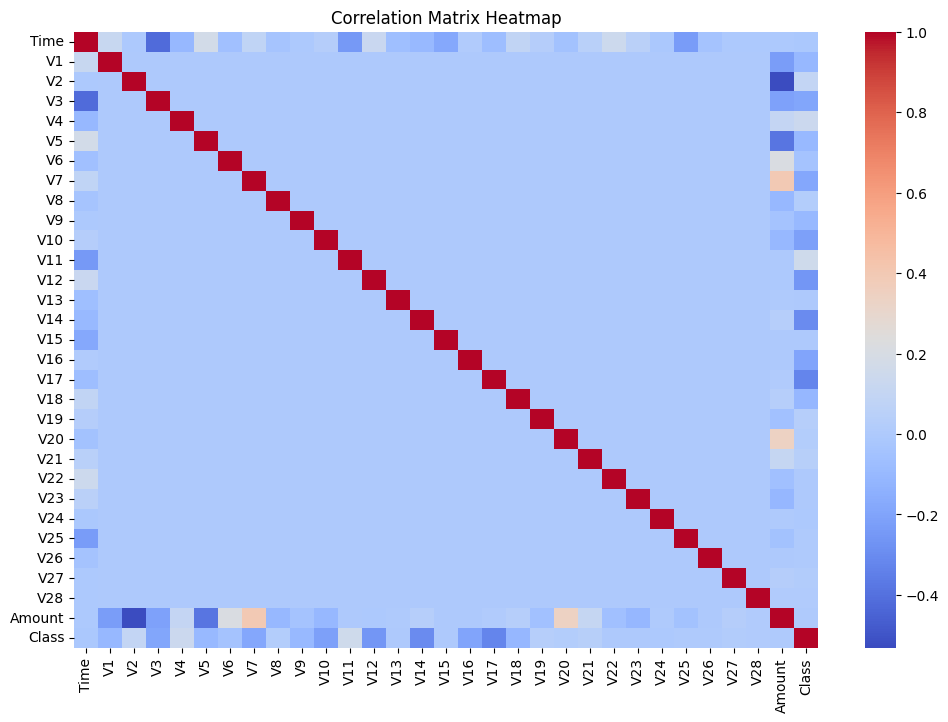

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

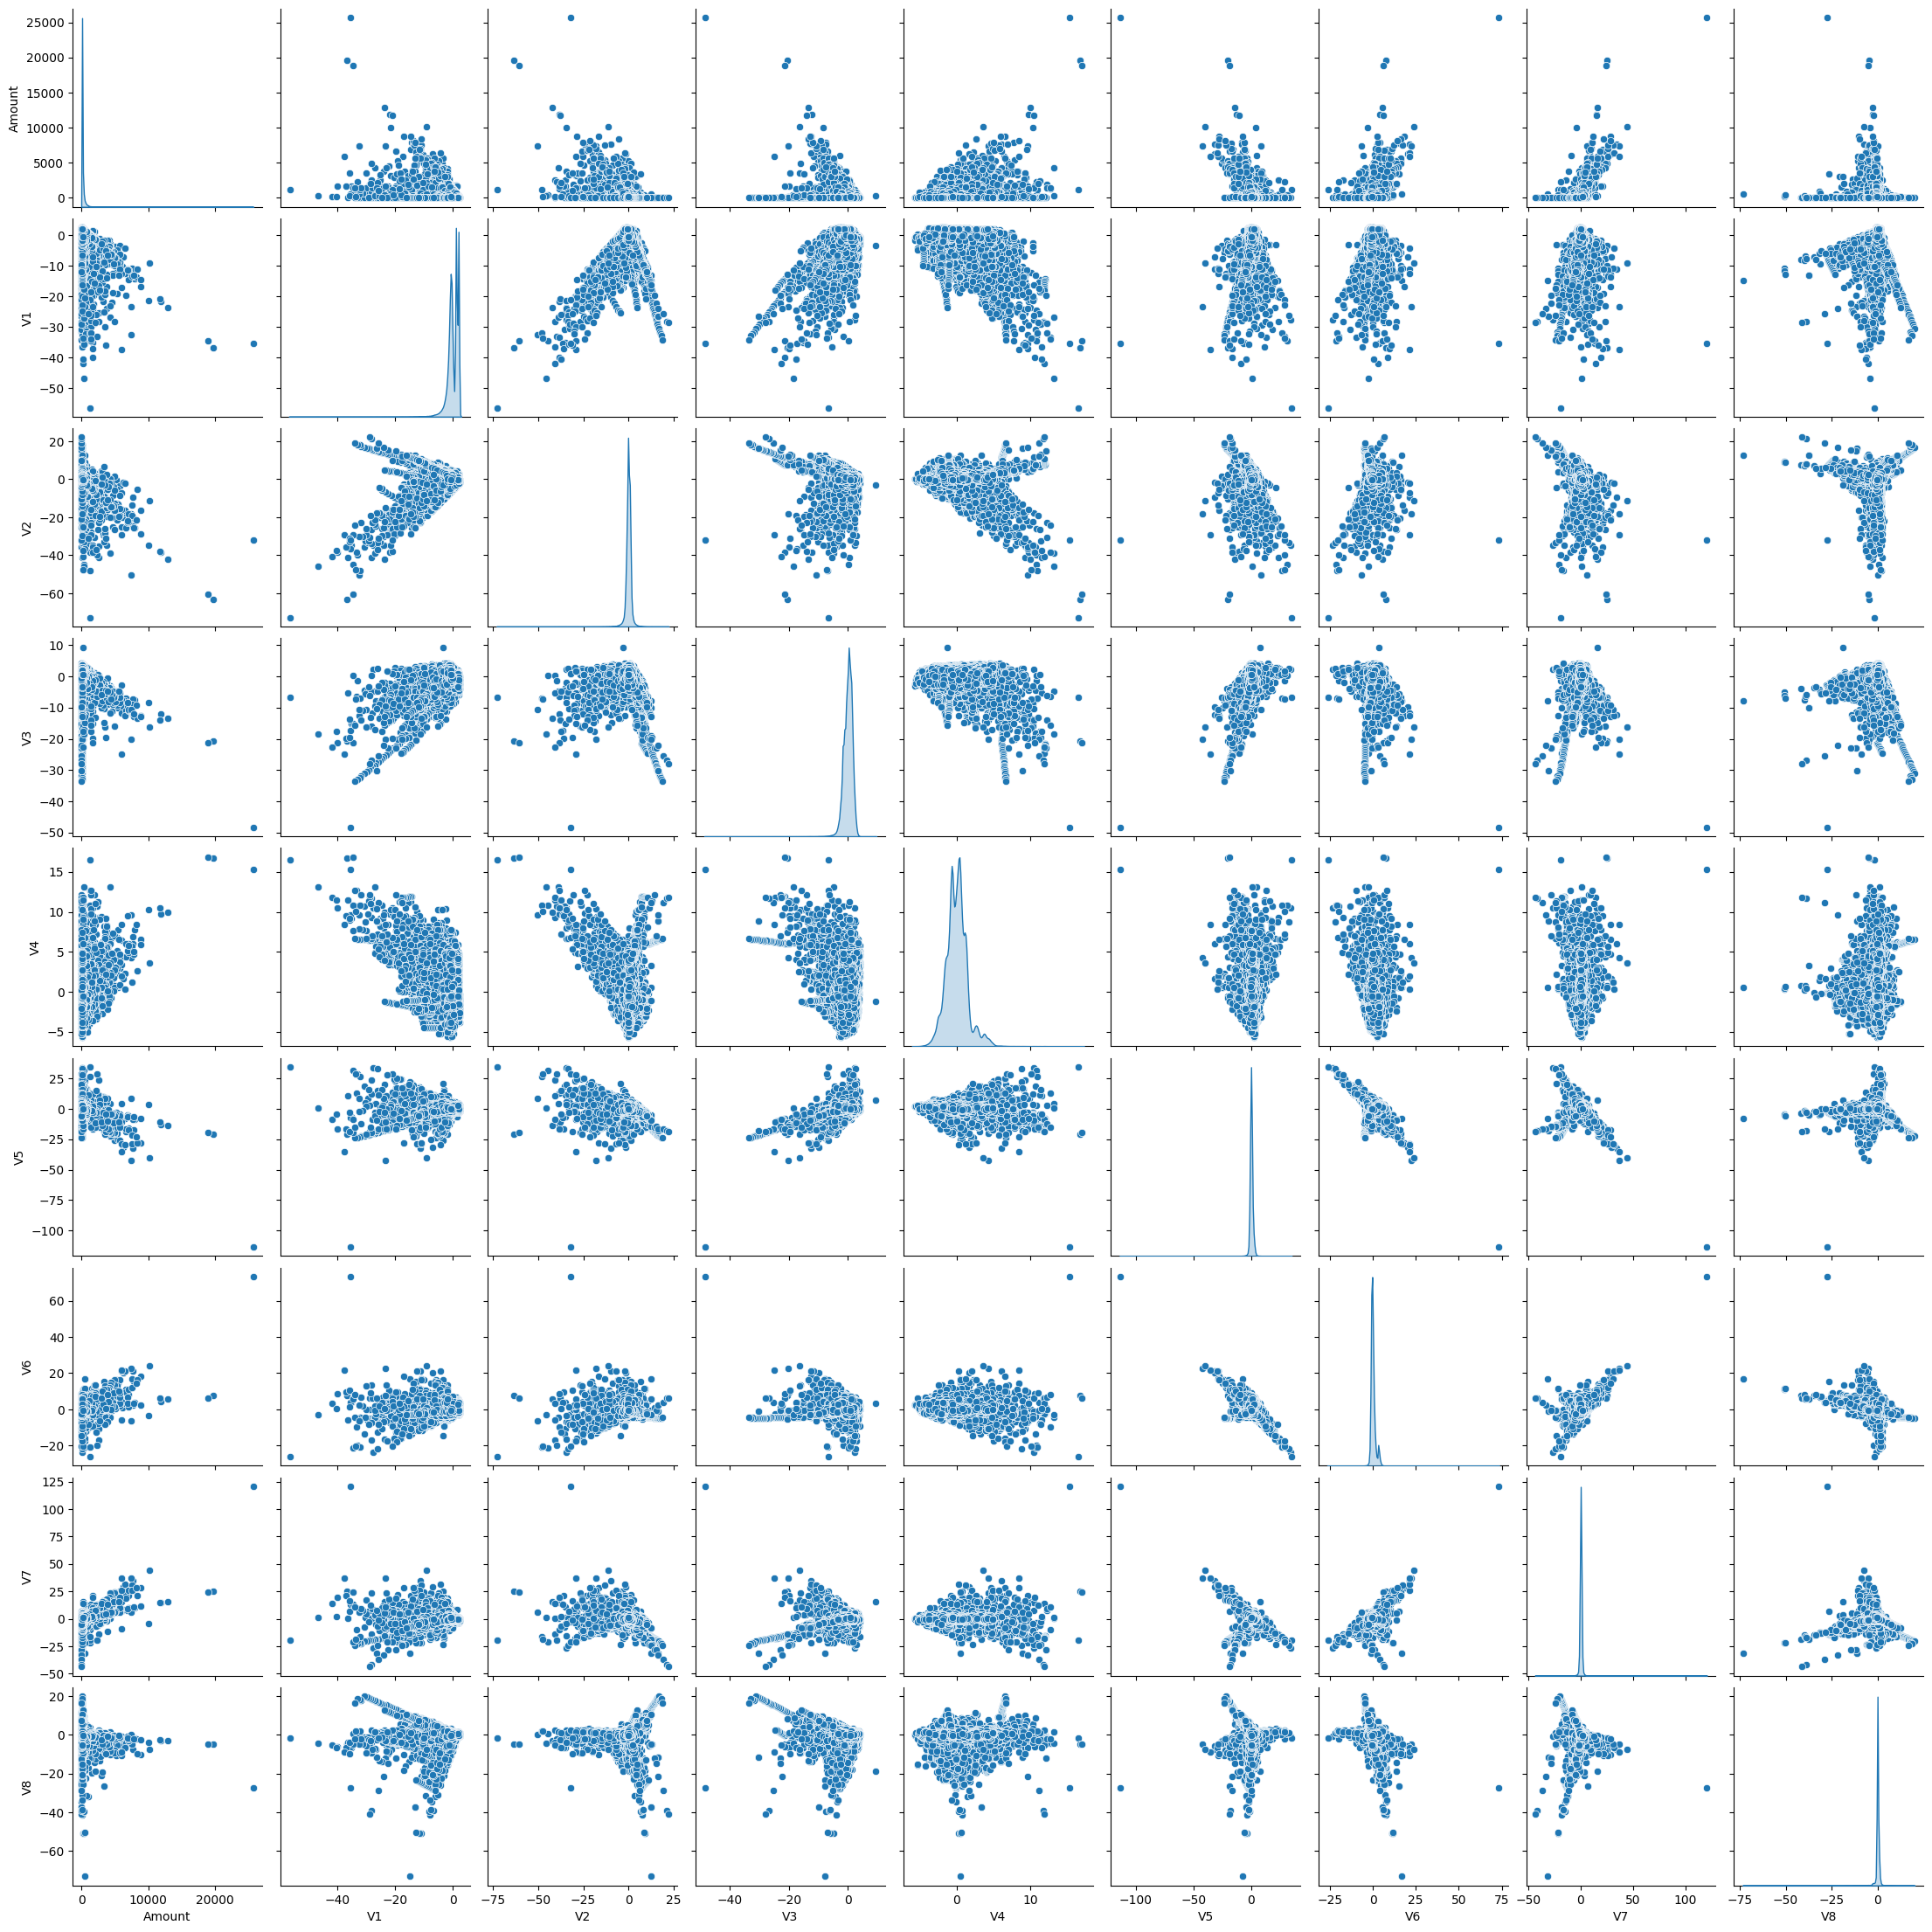

In [ ]:
# Pairplot of selected features
selected_features = ['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


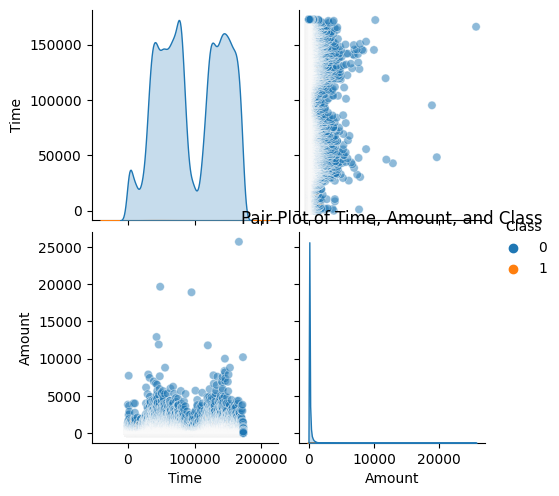

In [ ]:
# Pair plot for selected features
sns.pairplot(df[['Time', 'Amount', 'Class']], hue='Class', plot_kws={'alpha': 0.5})
plt.title("Pair Plot of Time, Amount, and Class")
plt.show()

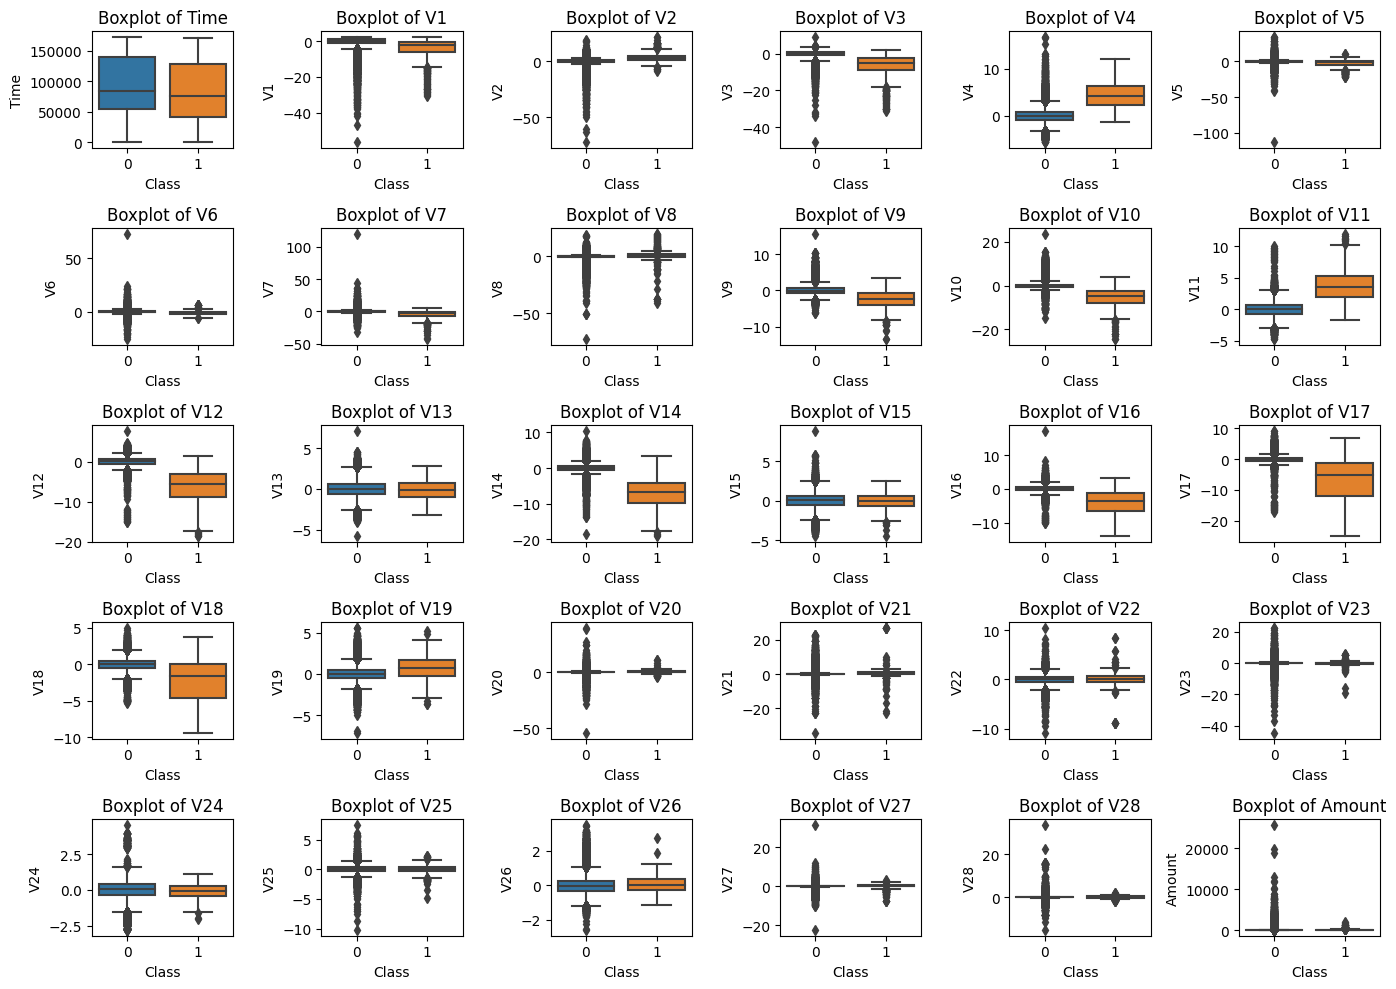

Percentage of outliers: Time      0.000000
V1        0.041919
V2        0.048907
V3        0.022505
V4        0.035044
V5        0.033356
V6        0.052690
V7        0.038521
V8        0.047808
V9        0.025971
V10       0.039506
V11       0.007747
V12       0.038430
V13       0.013501
V14       0.038283
V15       0.014203
V16       0.023525
V17       0.028486
V18       0.019085
V19       0.038498
V20       0.052611
V21       0.046030
V22       0.013841
V23       0.038102
V24       0.007441
V25       0.031816
V26       0.011859
V27       0.054038
V28       0.036969
Amount    0.046166
dtype: float64


In [ ]:
# Select numerical features
numerical_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                      'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                      'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
                      'V28', 'Amount']

# Box plots to visualize outliers
plt.figure(figsize=(14, 10))
for feature in numerical_features:
    plt.subplot(5, 6, numerical_features.index(feature) + 1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Z-score method to detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df[numerical_features]))
outliers = (z_scores > 3)
outlier_percentage = np.sum(outliers) / (df.shape[0] * df.shape[1]) * 100
print("Percentage of outliers:", outlier_percentage)

#Data processing

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']


In [ ]:
# Preprocessing: Scaling numerical features and train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Implementation and Evaluation of Machine learning Models


In [ ]:
# Random Forest model with simplified hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
rf_class_report = classification_report(y_test, y_rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

# Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_dt_pred)
dt_conf_matrix = confusion_matrix(y_test, y_dt_pred)
dt_class_report = classification_report(y_test, y_dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)
print("Decision Tree Classification Report:\n", dt_class_report)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_lr_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
lr_accuracy = accuracy_score(y_test, y_lr_pred)
lr_conf_matrix = confusion_matrix(y_test, y_lr_pred)
lr_class_report = classification_report(y_test, y_lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_conf_matrix)
print("Logistic Regression Classification Report:\n", lr_class_report)

# K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the K-Nearest Neighbors model
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_knn_pred = knn_model.predict(X_test)

# Evaluate the K-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_conf_matrix = confusion_matrix(y_test, y_knn_pred)
knn_class_report = classification_report(y_test, y_knn_pred)

print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Confusion Matrix:\n", knn_conf_matrix)
print("K-Nearest Neighbors Classification Report:\n", knn_class_report)

Random Forest Accuracy: 0.998139110284049
Random Forest Confusion Matrix:
 [[56769    95]
 [   11    87]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.89      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Accuracy: 0.9842877707945648
Decision Tree Confusion Matrix:
 [[55985   879]
 [   16    82]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.84      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Logistic Regression Accuracy: 0.9745619886942172
Logistic

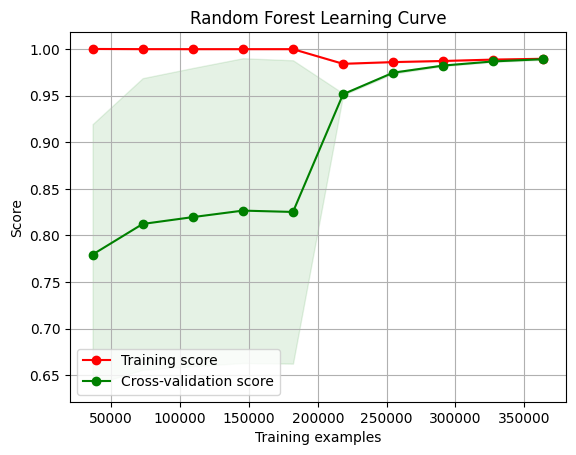

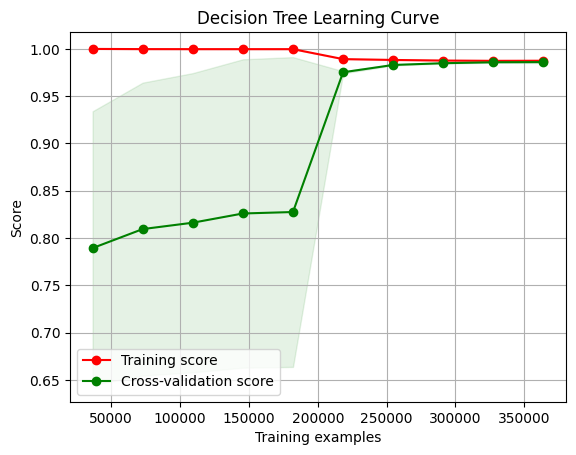

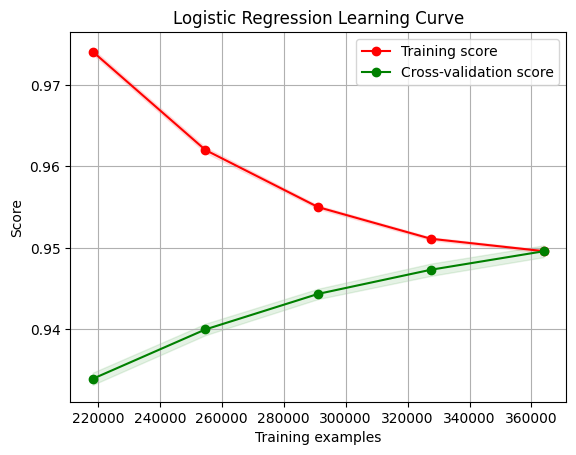

In [ ]:
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Random Forest model
plot_learning_curve(rf_model, X_train_resampled, y_train_resampled, title="Random Forest Learning Curve").show()

# Plot learning curve for Decision Tree model
plot_learning_curve(dt_model, X_train_resampled, y_train_resampled, title="Decision Tree Learning Curve").show()

# Plot learning curve for Logistic Regression model
plot_learning_curve(lr_model, X_train_resampled, y_train_resampled, title="Logistic Regression Learning Curve").show()

# Plot learning curve for K-Nearest Neighbors model
plot_learning_curve(knn_model, X_train_resampled, y_train_resampled, title="K-Nearest Neighbors Learning Curve").show()


# Implementation and Evaluation of Deep learning Models

In [ ]:
# CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled, epochs=10, batch_size=64)

# Evaluate the CNN model
cnn_pred = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
cnn_pred = (cnn_pred > 0.5)
cnn_accuracy = accuracy_score(y_test, cnn_pred)
cnn_conf_matrix = confusion_matrix(y_test, cnn_pred)
cnn_class_report = classification_report(y_test, cnn_pred)

print("CNN Accuracy:", cnn_accuracy)
print("CNN Confusion Matrix:\n", cnn_conf_matrix)
print("CNN Classification Report:\n", cnn_class_report)

# RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(64, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled, epochs=10, batch_size=64)

# Evaluate the RNN model
rnn_pred = rnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
rnn_pred = (rnn_pred > 0.5)
rnn_accuracy = accuracy_score(y_test, rnn_pred)
rnn_conf_matrix = confusion_matrix(y_test, rnn_pred)
rnn_class_report = classification_report(y_test, rnn_pred)

print("RNN Accuracy:", rnn_accuracy)
print("RNN Confusion Matrix:\n", rnn_conf_matrix)
print("RNN Classification Report:\n", rnn_class_report)



Epoch 1/10
7108/7108 [==============================] - 53s 7ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 2/10
7108/7108 [==============================] - 54s 8ms/step - loss: 0.0088 - accuracy: 0.9983
Epoch 3/10
7108/7108 [==============================] - 52s 7ms/step - loss: 0.0055 - accuracy: 0.9989
Epoch 4/10
7108/7108 [==============================] - 51s 7ms/step - loss: 0.0039 - accuracy: 0.9991
Epoch 5/10
7108/7108 [==============================] - 53s 7ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 6/10
7108/7108 [==============================] - 50s 7ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 7/10
7108/7108 [==============================] - 53s 7ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 8/10
7108/7108 [==============================] - 53s 8ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 9/10
7108/7108 [==============================] - 51s 7ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 10/10
1781/1781 [==============================] - 4s 2ms/step
CNN 

Epoch 1/10
7108/7108 [==============================] - 56s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0111 - val_accuracy: 0.9990
Epoch 2/10
7108/7108 [==============================] - 55s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0138 - val_accuracy: 0.9988
Epoch 3/10
7108/7108 [==============================] - 55s 8ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0110 - val_accuracy: 0.9992
Epoch 4/10
7108/7108 [==============================] - 54s 8ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0111 - val_accuracy: 0.9991
Epoch 5/10
7108/7108 [==============================] - 55s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0126 - val_accuracy: 0.9991
Epoch 6/10
7108/7108 [==============================] - 54s 8ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0135 - val_accuracy: 0.9990
Epoch 7/10
7108/7108 [==============================] - 54s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0114 - val_ac

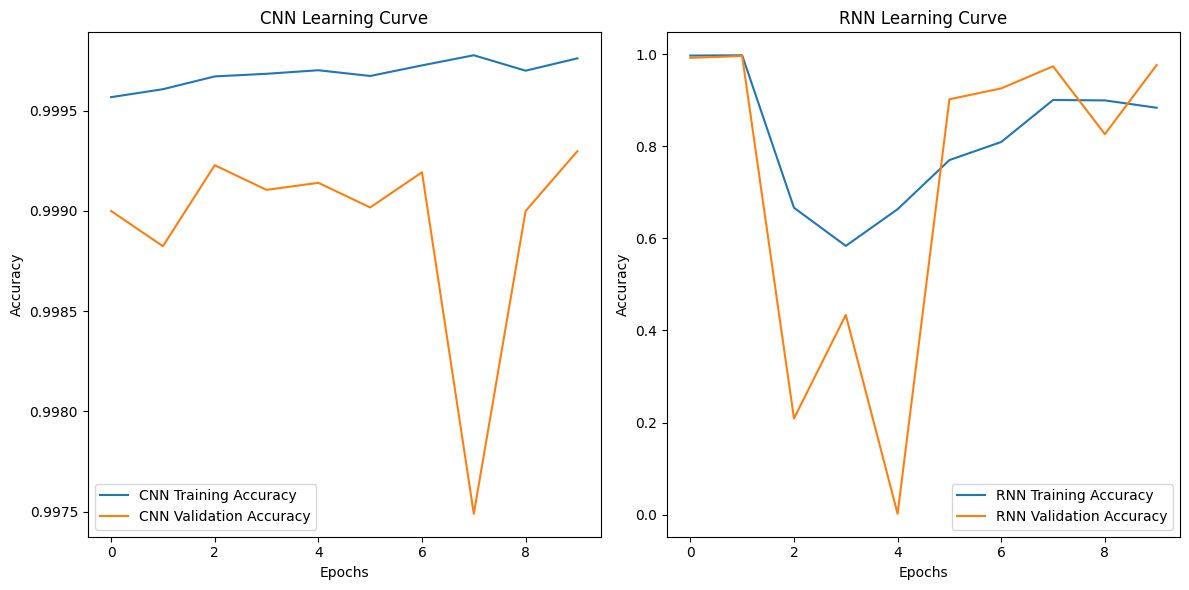

In [ ]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Train the RNN model
rnn_history = rnn_model.fit(X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Plot learning curves for CNN and RNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Learning Curve')

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Learning Curve')

plt.tight_layout()
plt.show()


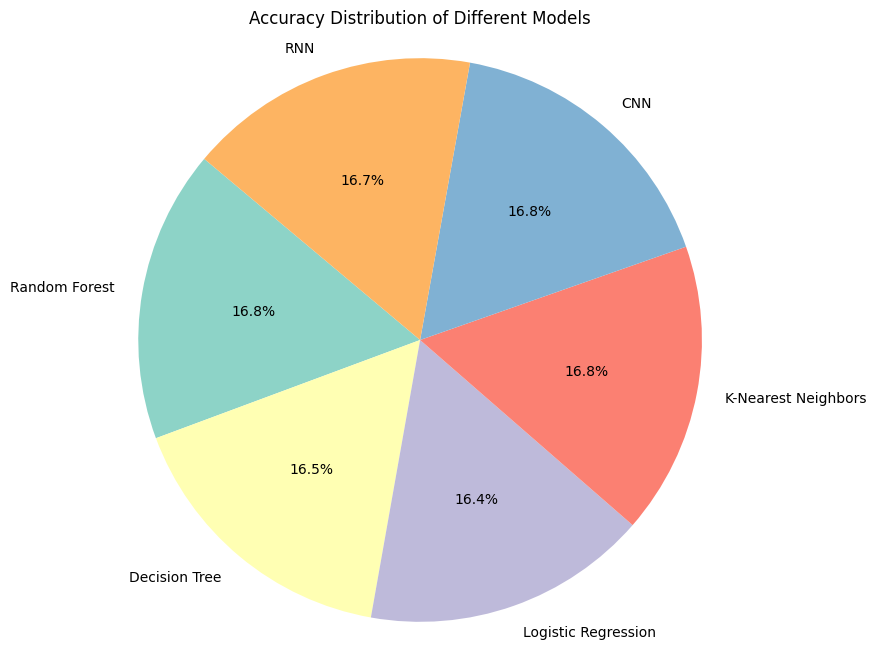

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Nearest Neighbors", "CNN", "RNN"]
accuracies = [0.998, 0.984, 0.975, 0.998, 0.999, 0.995]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Accuracy Distribution of Different Models")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


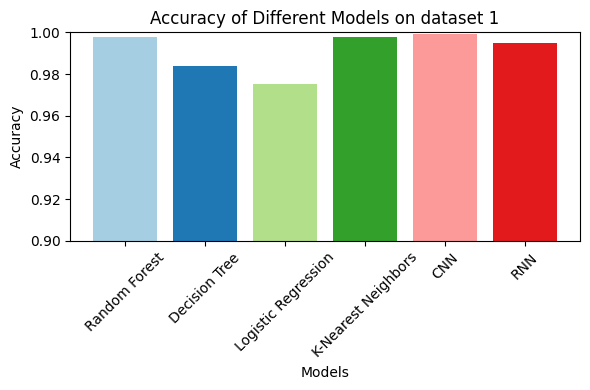

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Nearest Neighbors", "CNN", "RNN"]
accuracies = [0.998, 0.984, 0.975, 0.998, 0.999, 0.995]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=plt.cm.Paired.colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on dataset 1')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

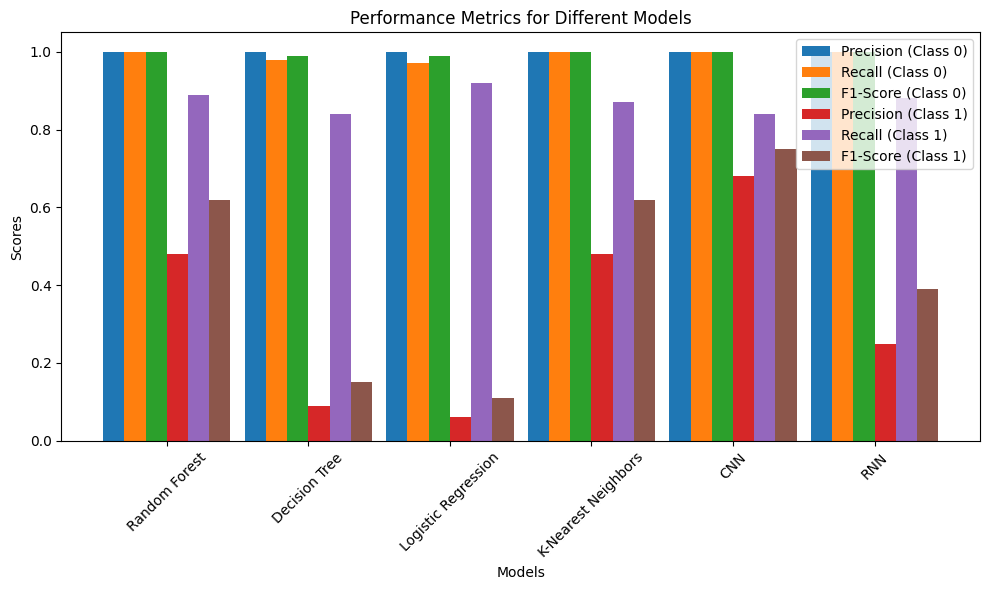

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Random Forest", "Decision Tree", "Logistic Regression", "K-Nearest Neighbors", "CNN", "RNN"]

# Precision, Recall, and F1-Score data for Class 0 and Class 1
precision_class_0 = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
recall_class_0 = [1.00, 0.98, 0.97, 1.00, 1.00, 1.00]
f1_score_class_0 = [1.00, 0.99, 0.99, 1.00, 1.00, 1.00]

precision_class_1 = [0.48, 0.09, 0.06, 0.48, 0.68, 0.25]
recall_class_1 = [0.89, 0.84, 0.92, 0.87, 0.84, 0.88]
f1_score_class_1 = [0.62, 0.15, 0.11, 0.62, 0.75, 0.39]

# Bar width
bar_width = 0.15
index = np.arange(len(models))

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width, precision_class_0, bar_width, label='Precision (Class 0)')
bar2 = ax.bar(index, recall_class_0, bar_width, label='Recall (Class 0)')
bar3 = ax.bar(index + bar_width, f1_score_class_0, bar_width, label='F1-Score (Class 0)')

bar4 = ax.bar(index + 2 * bar_width, precision_class_1, bar_width, label='Precision (Class 1)')
bar5 = ax.bar(index + 3 * bar_width, recall_class_1, bar_width, label='Recall (Class 1)')
bar6 = ax.bar(index + 4 * bar_width, f1_score_class_1, bar_width, label='F1-Score (Class 1)')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
